# Лабораторная работа 4

Плотные нейронные сети

Набор базовых данных о биологических сигналах здоровья.
Цель состоит в том, чтобы определить наличие или отсутствие курения с помощью биосигналов.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./smoking.csv', delimiter=',', encoding='utf8')
del dfInit["ID"]
df = dfInit.copy(deep=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


#### Преобразование параметров

In [3]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
        
    print(f"{fieldName} = {dataDict}\n")

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [4]:
df.dropna(axis=0, inplace=True)

updateData(fieldName="gender")
updateData(fieldName="oral")
updateData(fieldName="tartar")

df

gender = {'M': 0, 'F': 1}

oral = {'Y': 0}

tartar = {'Y': 0, 'N': 1}



,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,0,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,1,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,1,0


#### Разделение на обучающие и тестовые данные


In [5]:
x = df.drop(['smoking'], axis=1)
y = df['smoking']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

#### Многослойный перцептрон

In [7]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

Количество нейронов на 1 уровне

In [8]:
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]

# activation=relu, solver=lbfgs, max_iter=200

for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='lbfgs',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42
    )
    
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(60,), accuracy=0.7569427819008858


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(100,), accuracy=0.7537107972228873


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(150,), accuracy=0.762808235575772


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(200,), accuracy=0.7565238209241082


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(250,), accuracy=0.7584390711036629


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(350,), accuracy=0.7596361024658846


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(500,), accuracy=0.7564639693559971


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(750,), accuracy=0.7640651185061048
layerSize=(1000,), accuracy=0.7631673449844386


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Оптимизатор

In [9]:
solverArr = ['lbfgs', 'sgd', 'adam']

# activation=relu, max_iter=200
# 'lbfgs' -- для маленьких датасетов
# 'sgd' -- стохастический градиентный спуск
# 'adam' -- для больших датасетов

for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


solver=lbfgs, accuracy=0.762808235575772
solver=sgd, accuracy=0.7523342111563323
solver=adam, accuracy=0.7635264543931051


Функция активации

In [10]:
fArr = ['identity', 'logistic', 'tanh', 'relu']

# max_iter=200

for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.7438352884845583


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


f=logistic, accuracy=0.7619703136222169


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


f=tanh, accuracy=0.7572420397414412
f=relu, accuracy=0.762808235575772


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Число итераций

In [11]:
iterArr = [200, 500, 700, 1000]

for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter
    )
    
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


max_iter=200, accuracy=0.762808235575772


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


max_iter=500, accuracy=0.7601149150107733


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


max_iter=700, accuracy=0.7565238209241082
max_iter=1000, accuracy=0.7595163993296624


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Итоговый результат

In [12]:
mlpcClf = MLPClassifier(
    activation='relu',
    solver='lbfgs',
    hidden_layer_sizes=(150,), 
    early_stopping=True,
    random_state=42,
    max_iter=200
)

print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.762808235575772


/Users/kirill/Documents/bmstu/neuro_fuzzy_systems/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


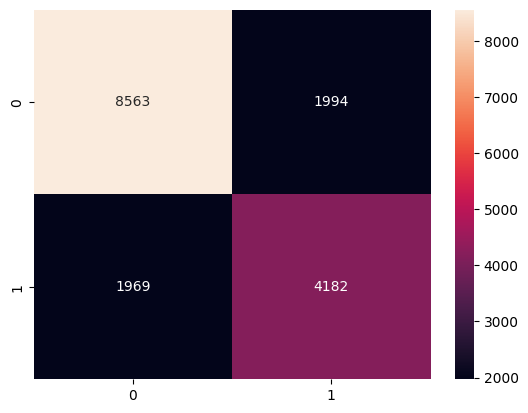

In [13]:
classes_names = ['0','1']
cm = pd.DataFrame(
    confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), 
    columns=classes_names, 
    index=classes_names
)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()